In [1]:
# 전에 농어 무게를 예측하는 k-최근접알고리즘을 사용해서
# 회귀 모델을 사용해본 결과 정확한 예측이 어려울 수 있다라는 결론이 생김
# (원본데이터의 개수 부족)

# 길이가 50cm인 농어가 들어왔을 때의 회귀는??? (한계점이 생김)

In [2]:
import numpy as np

# 넘파이를 이용해서 배열을 생성함
# 농어 56개 데이터임
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
# 사이킷런을 이용해서 훈련세트와 테스트 세트를 나눔.

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)


In [10]:
print(train_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [9]:
# 2차원 배열로 만들어야 함
# -1 지정하면 원소 개수로 모두채우라는 의미 , 1은 두번 째 크기를 1로(특성)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [11]:
from sklearn.neighbors import KNeighborsRegressor # 회귀 알고리즘용 구현 클래스

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)
# 사이킷 런의 k-최근접이웃 기본값이 5인데 이것을 3으로 변경
# 이웃의 갯수를 3으로 설정합니다
print(knr.predict([[50]])) # 50cm인 농어의 무게를 예측한 결과 1,033g

[1033.33333333]


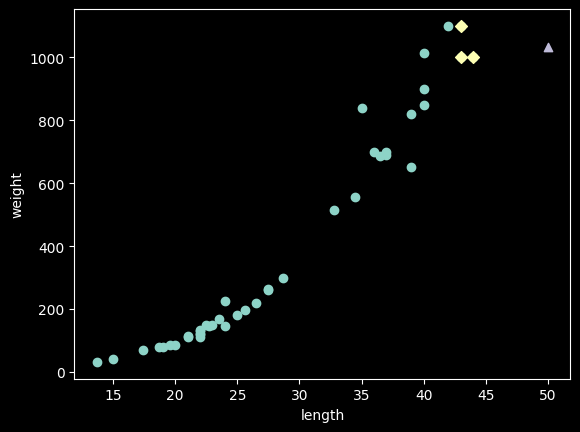

In [12]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#50센티 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 결론 50이상의 길이 데이터가 없고 무게도 없다 (아래쪽의 평균이 나옴)

In [13]:
print(np.mean(train_target[indexes])) # 45센티 근방으로 평균값이 나옴

1033.3333333333333


In [14]:
print(knr.predict([[100]]))     # 100센티짜리로 결과

[1033.33333333]


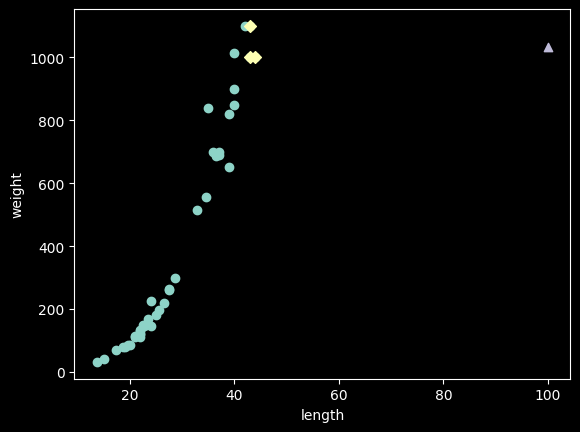

In [15]:
# 결론 기본데이터 부족으로 한계가 생김

# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()  # k최근접 이웃 알고리즘은 가볍고 사용하기 쉬운 대신 한계가 있다.

In [16]:
# k-최근점 이웃 알고리즘의 한계에 대안 -> 선형회귀

In [17]:
# 선형회귀(linear:리니어) 비교적 간단하고 성능이 뛰어남
# 선형이라는 말에서 짐작할 수 있듯이 직선을 학습하는 알고리즘
# 빨간선이 가로로 되어 있으면 농어의 무게를 1개로 인식함
# 빨간선이 위에서 시작해서 아래로 떨어지면 반대로 예측
# 빨간선이 아래에서 시작해서 위로 올라가면 정상적인 차트로 구현

# 싸이킷런에서 제공하는 클래스를 사용해 보자
from sklearn.linear_model import LinearRegression
# LinearRegression 선형 회귀용

lr = LinearRegression() # 선형 회귀용 객체 생성하여 변수에 연결
lr.fit(train_input, train_target)   # 선형 회귀용으로 훈련 시작

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:

print(lr.predict([[50]]))
# 농어의 무게 기울기+절편 (y(농어의 무게) = a * x(농어의 길이) + b)
# 직선의 방정식!!! 무게(1241.83g)로 예측

[1241.83860323]


In [22]:
print(lr.coef_, lr.intercept_) # lr.coef_ 계수, lr.intercept_ 인터셉트
# 기울기를 종종 계수(coefficent), 가중치(weight)라고도 부른다.
# intercept_ (절편항)
# y = ax + b
# 여기서 coef는 a, intercept는 b

[39.01714496] -709.0186449535474


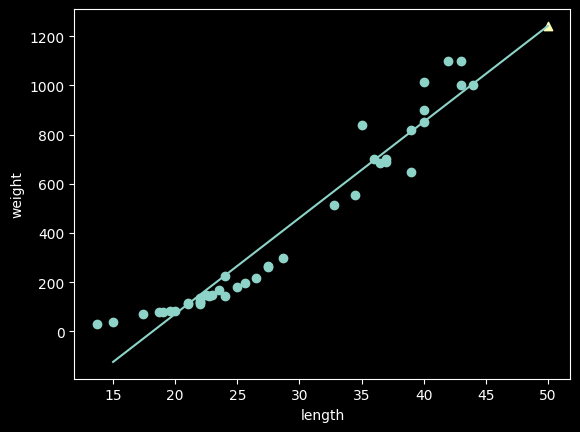

In [23]:
# 그래프로 확인 해보자.

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 직선차트 x축값                 y축값[15*계수+인터셉트, 50*계수+인터셉트]
#                농어의 무게공식 = 기울기*농어의길이+절편

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
# 결론 예측은 가능한데 직선이라 값이 너무 직선적이다.

print(lr.score(train_input, train_target))  # 93.98%
print(lr.score(test_input, test_target))    # 82.47%
# 훈련세트가 테스트에 비해 높지만 차이가 많이 남으로 과소적합이라고 함 (5%내외가 좋다.)

0.9398463339976041
0.824750312331356


In [25]:
# 다항회귀(Polynomial Regression) 제곱을 활용해서 직선을 곡선으로 처리가능

In [27]:
# 다항회귀는 2차원 방정식의 그래프로 그리려면
# 길이를 제곱한 항이 훈련세트에 추가되어야 함

# 선형회귀의 문제점은 왼쪽 하단에 있는 기준점이 불일치가 된다.
# -> 곡선으로 만들어야 함
train_poly = np.column_stack((train_input ** 2, train_input))
# 제곱한 것과 두 배열을 나란히 붙인다.
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)
# 2개의 특성이 만들어짐 (제곱값,원본값)

(42, 2) (14, 2)


In [28]:
print(train_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [32]:
lr = LinearRegression()             # 선형회귀 객체 생성
lr.fit(train_poly, train_target)    # 훈련시작!

x = 50

print(lr.predict([[x ** 2, x]]))    # 결과 테스트
# 테스트할 때 이 모델의 농어 길이의 제곱과 원래 길이를 함께 넣음
# 결과 50센티의 무게는 1573.98g로 나옴
# 직선형에서는 50센티의 무게는 1241.83g으로 나옴

[1573.98423528]


In [33]:
# 농어의 무게 기울기+절편
# (y(농어의 무게) = a * x(농어의 길이) + b)
print(lr.coef_, lr.intercept_) # lr.coef_ 계수, lr.intercept_ 인터셉트
# 1573.98 = 1.01         * 50**2            - 21.55 * 50 + 116.05
# 무게 = lr.coef_[0] * x **2 - lr.coef_[1] * x + lr.intercept_

[  1.01433211 -21.55792498] 116.05021078278264


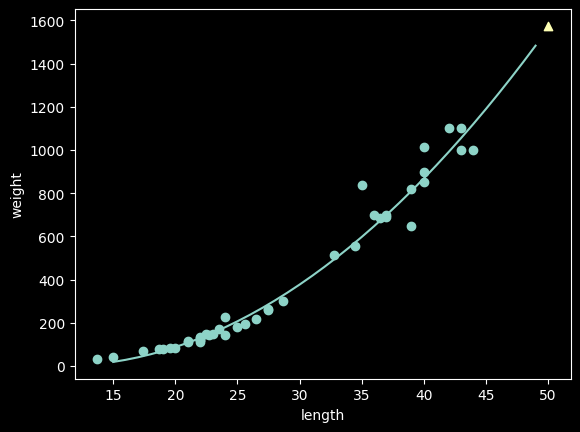

In [34]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05) # 다항회귀 공식 적용
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 문제 해결을 위해 선형회귀와 다항회귀를 통해 문제를 해결하려고 했다.
# 하지만 아직 모델에 과소적합이 남아있다.
# 이를 해결하기 위해 조금 더 복잡한 모델을 만들어야 할 것 같다.
# 또 복잡한 모델을 만들다가 너무 복잡해진 경우
# 모델의 복잡도를 억제하는 방법도 알아봐야 할 것 같다.

0.9706807451768623
0.9775935108325122


In [36]:
# 선형 회귀 -> 다항 회귀(polynomial regression)
# https://wooono.tistory.com/326
from sklearn.preprocessing import PolynomialFeatures

In [37]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [56]:
train_input_1, test_input_1, train_target_1, test_target_1 = train_test_split(perch_length, perch_weight, random_state=42)

In [57]:
print(train_input_1.shape, test_input_1.shape)

(42,) (14,)


In [58]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [59]:
train_input_1 = train_input_1.reshape(-1, 1)
test_input_1 = test_input_1.reshape(-1, 1)

In [60]:
train_poly_1 = poly.fit_transform(train_input_1)
test_poly_1 = poly.fit_transform(test_input_1)

In [61]:
print(train_poly_1)

[[  19.6   384.16]
 [  22.    484.  ]
 [  18.7   349.69]
 [  17.4   302.76]
 [  36.   1296.  ]
 [  25.    625.  ]
 [  40.   1600.  ]
 [  39.   1521.  ]
 [  43.   1849.  ]
 [  22.    484.  ]
 [  20.    400.  ]
 [  22.    484.  ]
 [  24.    576.  ]
 [  27.5   756.25]
 [  43.   1849.  ]
 [  40.   1600.  ]
 [  24.    576.  ]
 [  21.    441.  ]
 [  27.5   756.25]
 [  40.   1600.  ]
 [  32.8  1075.84]
 [  26.5   702.25]
 [  36.5  1332.25]
 [  13.7   187.69]
 [  22.7   515.29]
 [  15.    225.  ]
 [  37.   1369.  ]
 [  35.   1225.  ]
 [  28.7   823.69]
 [  23.5   552.25]
 [  39.   1521.  ]
 [  21.    441.  ]
 [  23.    529.  ]
 [  22.    484.  ]
 [  44.   1936.  ]
 [  22.5   506.25]
 [  19.    361.  ]
 [  37.   1369.  ]
 [  22.    484.  ]
 [  25.6   655.36]
 [  42.   1764.  ]
 [  34.5  1190.25]]


In [62]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(train_poly_1, train_target_1)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
print(linreg.coef_, linreg.intercept_)

[-21.55792498   1.01433211] 116.05021078278395


In [65]:
linreg.coef_ * np.column_stack((np.square(point), point))

array([[-4.85053312e+03,  1.52149816e+01],
       [-5.51882879e+03,  1.62293138e+01],
       [-6.23024032e+03,  1.72436459e+01],
       [-6.98476769e+03,  1.82579780e+01],
       [-7.78241092e+03,  1.92723101e+01],
       [-8.62316999e+03,  2.02866422e+01],
       [-9.50704492e+03,  2.13009743e+01],
       [-1.04340357e+04,  2.23153064e+01],
       [-1.14041423e+04,  2.33296385e+01],
       [-1.24173648e+04,  2.43439706e+01],
       [-1.34737031e+04,  2.53583027e+01],
       [-1.45731573e+04,  2.63726348e+01],
       [-1.57157273e+04,  2.73869670e+01],
       [-1.69014132e+04,  2.84012991e+01],
       [-1.81302149e+04,  2.94156312e+01],
       [-1.94021325e+04,  3.04299633e+01],
       [-2.07171659e+04,  3.14442954e+01],
       [-2.20753152e+04,  3.24586275e+01],
       [-2.34765803e+04,  3.34729596e+01],
       [-2.49209613e+04,  3.44872917e+01],
       [-2.64084581e+04,  3.55016238e+01],
       [-2.79390708e+04,  3.65159559e+01],
       [-2.95127993e+04,  3.75302880e+01],
       [-3.

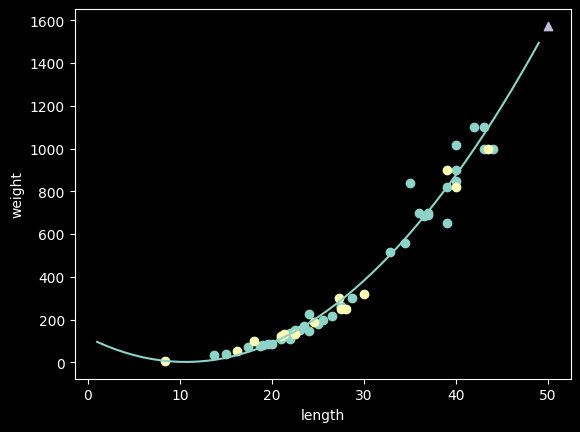

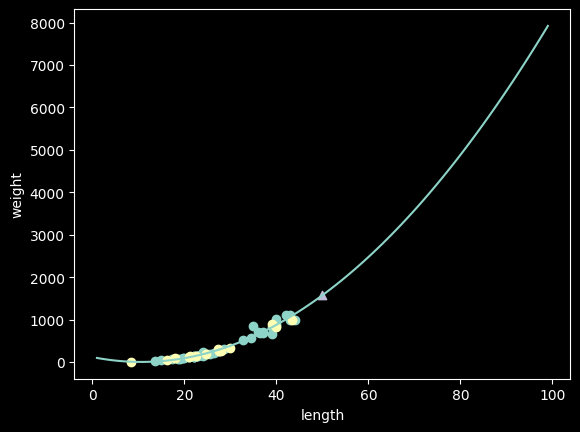

In [79]:
for i in range(1, 3):
    point = np.arange(1, 50 * i)
    point = point.reshape(-1, 1)
    point_poly_1 = poly.fit_transform(point)
    # 훈련 세트의 산점도를 그립니다
    plt.scatter(train_input_1, train_target_1)
    plt.scatter(test_input_1, test_target_1)

    plt.plot(point, linreg.predict(point_poly_1))
    # 15에서 49까지 2차 방정식 그래프를 그립니다
    # 50cm 농어 데이터
    plt.scatter([50], [1574], marker='^')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()